# HW 04 - CLUSTERING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer
import sklearn.metrics as skm

%matplotlib inline

In [2]:
# loading the data set
federalist_papers = pd.read_csv('HW4-data-fedPapers85.csv') # file path needs to be replaced if code is run on another machine
federalist_papers.shape # 85 rows and 72 columns in the data set

(85, 72)

In [3]:
federalist_papers.head() # viewing the first 5 rows in the data set

,author,filename,a,all,also,an,and,any,are,as,...,was,were,what,when,which,who,will,with,would,your
0,dispt,dispt_fed_49.txt,0.280,0.052,0.009,0.096,0.358,0.026,0.131,0.122,...,0.009,0.017,0.000,0.009,0.175,0.044,0.009,0.087,0.192,0.0
1,dispt,dispt_fed_50.txt,0.177,0.063,0.013,0.038,0.393,0.063,0.051,0.139,...,0.051,0.000,0.000,0.000,0.114,0.038,0.089,0.063,0.139,0.0
2,dispt,dispt_fed_51.txt,0.339,0.090,0.008,0.030,0.301,0.008,0.068,0.203,...,0.008,0.015,0.008,0.000,0.105,0.008,0.173,0.045,0.068,0.0
3,dispt,dispt_fed_52.txt,0.270,0.024,0.016,0.024,0.262,0.056,0.064,0.111,...,0.087,0.079,0.008,0.024,0.167,0.000,0.079,0.079,0.064,0.0
4,dispt,dispt_fed_53.txt,0.303,0.054,0.027,0.034,0.404,0.040,0.128,0.148,...,0.027,0.020,0.020,0.007,0.155,0.027,0.168,0.074,0.040,0.0


In [4]:
federalist_papers.info() # datatype and null values in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 72 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   author    85 non-null     object 
 1   filename  85 non-null     object 
 2   a         85 non-null     float64
 3   all       85 non-null     float64
 4   also      85 non-null     float64
 5   an        85 non-null     float64
 6   and       85 non-null     float64
 7   any       85 non-null     float64
 8   are       85 non-null     float64
 9   as        85 non-null     float64
 10  at        85 non-null     float64
 11  be        85 non-null     float64
 12  been      85 non-null     float64
 13  but       85 non-null     float64
 14  by        85 non-null     float64
 15  can       85 non-null     float64
 16  do        85 non-null     float64
 17  down      85 non-null     float64
 18  even      85 non-null     float64
 19  every     85 non-null     float64
 20  for       85 non-null     float64


#### All the columns are numeric variables except for author and file name

In [5]:
# number of federal papers 
federalist_papers.author.value_counts()

Hamilton    51
Madison     15
dispt       11
Jay          5
HM           3
Name: author, dtype: int64

Text(0.5, 1.0, 'Pie Chart of Authors')

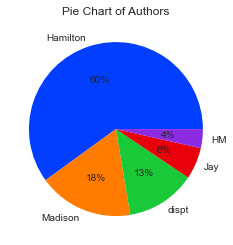

In [6]:
plt.pie(federalist_papers.author.value_counts(), labels = ['Hamilton','Madison','dispt','Jay','HM'], 
        colors = sns.color_palette('bright'), 
        autopct = '%0.0f%%')
plt.title('Pie Chart of Authors')

#### Data is imbalanced - data has 60% of essays written by hamilton

In [7]:
#Summary of the authors
federalist_papers[['author']].describe()

,author
count,85
unique,5
top,Hamilton
freq,51


<AxesSubplot:>

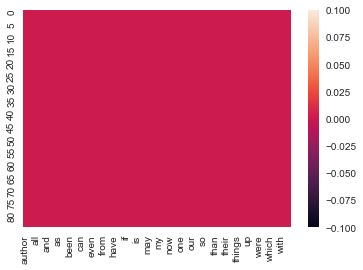

In [8]:
sns.heatmap(federalist_papers.isnull()) # no null values present

<AxesSubplot:>

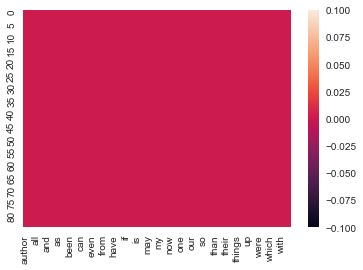

In [9]:
sns.heatmap(federalist_papers.isna()) # no NA's are present

In [10]:
federalist_papers['author'].unique()

array(['dispt', 'Hamilton', 'HM', 'Jay', 'Madison'], dtype=object)

In [11]:
paper_arr = federalist_papers.iloc[:,2:].values
paper_arr.shape

(85, 70)

In [12]:
paper_arr

array([[0.28 , 0.052, 0.009, ..., 0.087, 0.192, 0.   ],
       [0.177, 0.063, 0.013, ..., 0.063, 0.139, 0.   ],
       [0.339, 0.09 , 0.008, ..., 0.045, 0.068, 0.   ],
       ...,
       [0.177, 0.052, 0.047, ..., 0.099, 0.021, 0.   ],
       [0.243, 0.091, 0.008, ..., 0.061, 0.023, 0.   ],
       [0.347, 0.097, 0.007, ..., 0.083, 0.083, 0.   ]])

# K MEANS CLUSTERING

#### Elbow method for finding optimal number of clusters (K value)

In [13]:
SSE_cluster = []
for i in range(2,11): # choosing 10 clusters
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(paper_arr) # Compute k-means clustering
    SSE_cluster.append(kmeans.inertia_)

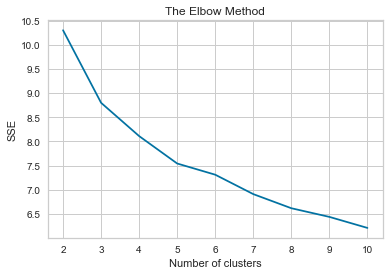

In [14]:
plt.plot(range(2,11),SSE_cluster) # plotting numbers of clusers vs SSE
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

#### From the above SSE vs Number of clusters line plot, we can conclude that optimal number of clusters as 5

In [15]:
# Fitting K means to the dataset
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans = kmeans.fit_predict(paper_arr) # Compute cluster centers and predict cluster index for each sample
y_kmeans # contains index of the cluster each sample belongs to

array([1, 1, 1, 1, 3, 1, 3, 4, 1, 3, 1, 3, 3, 3, 3, 3, 2, 4, 3, 3, 2, 3,
       3, 3, 2, 2, 2, 3, 2, 1, 3, 3, 3, 2, 3, 4, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 2, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 2, 2, 3, 2, 3, 3, 4, 4, 4, 0,
       0, 0, 0, 0, 4, 1, 4, 3, 1, 4, 1, 4, 1, 1, 1, 1, 1, 4, 1])

In [16]:
federalist_papers['predicted'] = y_kmeans
federalist_papers['predicted']

0     1
1     1
2     1
3     1
4     3
     ..
80    1
81    1
82    1
83    4
84    1
Name: predicted, Length: 85, dtype: int32

#### VALIDATING THE CLUSTER MODEL WITH SILHOUETTE SCORE

In [17]:
score = silhouette_score(paper_arr, y_kmeans)
score # 0.12 is still a good score because score is not negative. 

0.11557311610199418

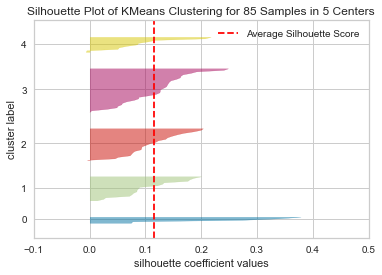

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 85 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [18]:
#Using Silhouette Plot
visualizer = SilhouetteVisualizer(kmeans,colors =  'yellowbrick')

#Fit the data to the visualizer
visualizer.fit(paper_arr)       

#Render the figure
visualizer.show()

In [19]:
# confusion matrix
tab = pd.crosstab(federalist_papers['author'],y_kmeans,rownames=['Actual'],colnames=['Predicted'])
tab

Predicted,0,1,2,3,4
Actual,,,,,
HM,0,0,0,0,3
Hamilton,0,1,22,26,2
Jay,5,0,0,0,0
Madison,0,9,0,1,5
dispt,0,7,0,3,1


In [20]:
# replacing predicted cluster numbers with class attribute
federalist_papers['predicted'].replace([0,1,2,3,4],['Jay','Madison','Hamilton','Hamilton','HM'],inplace=True)

In [21]:
skm.f1_score(federalist_papers['author'],federalist_papers['predicted'],average="macro")

0.5846220527045769

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

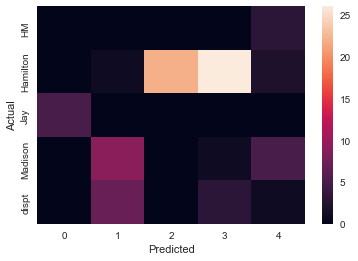

In [22]:
sns.heatmap(tab)

# HIERARCHIAL CLUSTERING

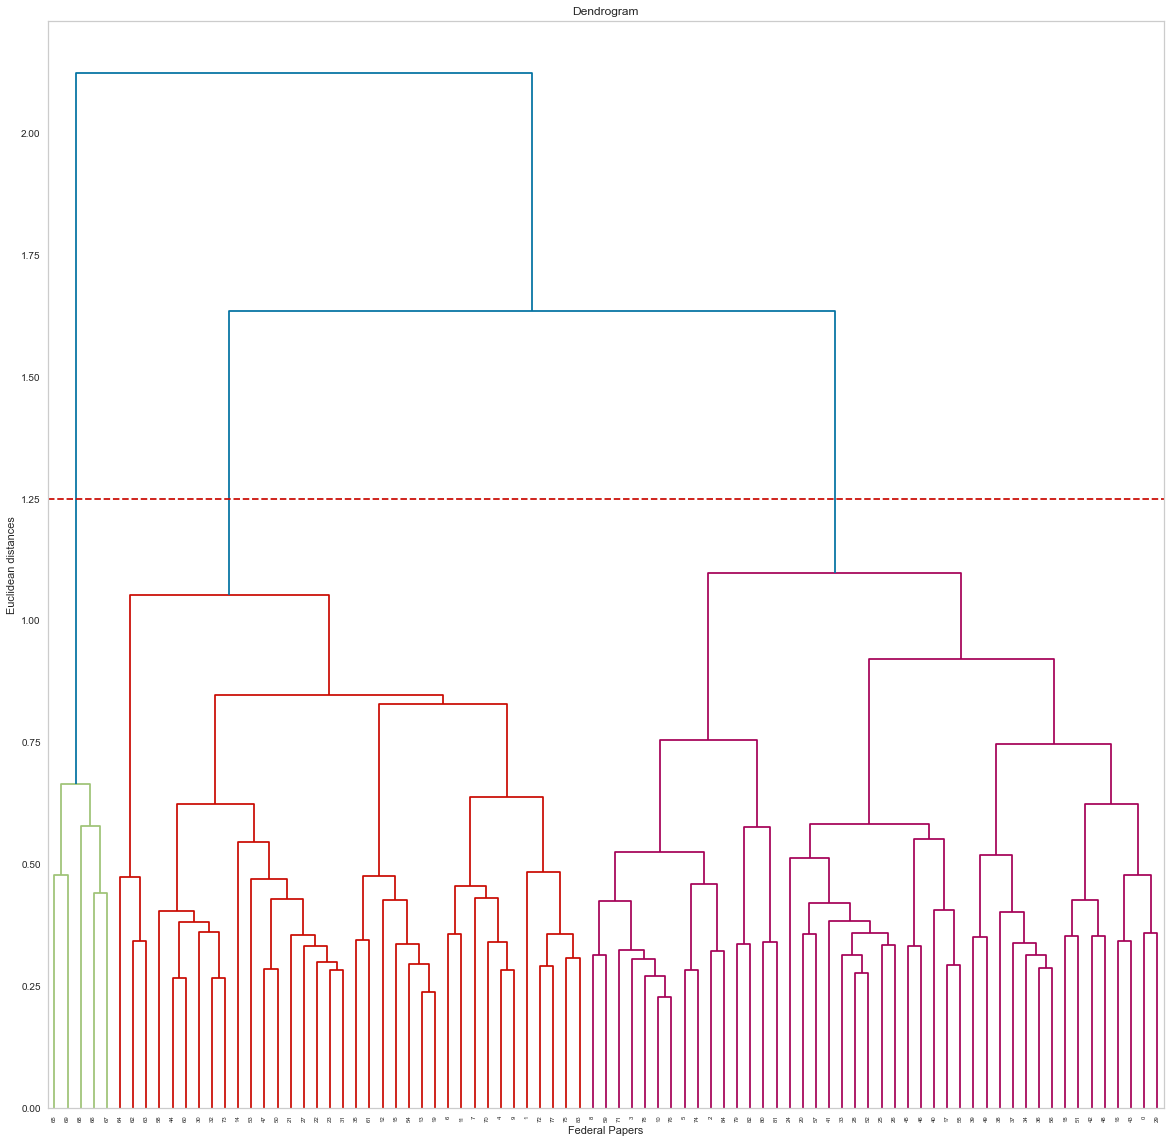

In [33]:
# dendogram to find number of clusters
plt.figure(figsize=(20, 20))  

dendrogram_comp = sch.dendrogram(sch.linkage(paper_arr, method  = "ward"), 
                            orientation='top')
plt.title('Dendrogram')
plt.xlabel('Federal Papers')
plt.ylabel('Euclidean distances')
plt.axhline(y=1.25, color='r', linestyle='--')
plt.grid(b=None)

#### From the above dendogram, we can conclude that optimal number of clusters are 3 but according to the given dataset, 5 clusters are possible

In [24]:
# Fitting hierarchical clustering to the federal papers dataset
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='ward')
predicted = hc.fit_predict(paper_arr)
predicted[:10]

array([0, 2, 1, 1, 2, 1, 2, 2, 1, 2], dtype=int64)

In [25]:
federalist_papers['predicted'] = predicted

In [26]:
# confusion matrix
tab = pd.crosstab(federalist_papers['author'],predicted,rownames=['Actual'],colnames=['Predicted'])
tab

Predicted,0,1,2,3,4
Actual,,,,,
HM,0,0,0,0,3
Hamilton,28,1,22,0,0
Jay,0,0,0,5,0
Madison,0,9,6,0,0
dispt,1,5,5,0,0


In [27]:
# replacing predicted cluster numbers with class attribute
federalist_papers['predicted'].replace([0,1,2,3,4],['Hamilton','Madison','Hamilton','Jay','HM'],inplace=True)

In [28]:
federalist_papers['predicted']

0     Hamilton
1     Hamilton
2      Madison
3      Madison
4     Hamilton
        ...   
80     Madison
81     Madison
82     Madison
83    Hamilton
84     Madison
Name: predicted, Length: 85, dtype: object

In [29]:
skm.f1_score(federalist_papers['author'],federalist_papers['predicted'],average="macro")

0.696991150442478

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

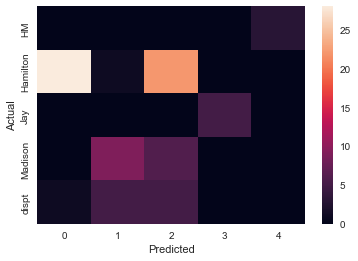

In [30]:
sns.heatmap(tab)